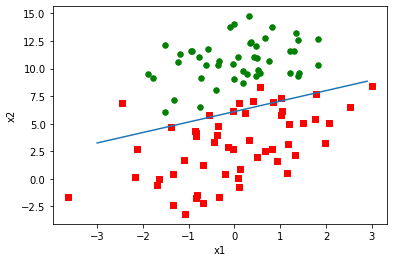

真实标签： [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
预测标签： [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
准确率： 0.95
训练后的参数： [[ 2.49505253]
 [ 0.38804373]
 [-0.40928784]]


In [43]:
from numpy import *

filename='testSet.txt'

def loadDataSet():
    dataMat=[]
    labelMat=[]
    fr=open(filename)
    for line in fr.readlines():
        lineAr=line.strip().split()
        dataMat.append([1.0,float(lineAr[0]),float(lineAr[1])])
        labelMat.append(int(lineAr[2]))
    return dataMat,labelMat

def sigmod(X):
    return 1.0/(1+exp(-X))


def gradAscent(dataMat,labelMat):
    dataMatrix=mat(dataMat)
    classLabels=mat(labelMat).transpose()
    #print(classLabels)
    m,n=shape(dataMatrix)
    print(m,n)
    alpha=0.001#梯度学习率
    maxCycles=200#迭代次数
    weights=ones((n,1))#（3，1）的参数权值
    for k in range(maxCycles):
        h=sigmod(dataMatrix*weights)#每次sigmod结果
        error=(classLabels-h)#求导后的：与真实值的误差
        weights=weights+alpha*dataMatrix.transpose()*error#迭代更新数
    return weights

    
def stocGradAscent(dataMat,labelMat):#随机梯度上升：数据量大时计算量大；所以采用每行数据就更新一次参数
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    alpha=0.001
    maxCycles=200
    weights=ones((n,1))
    for k in range(maxCycles):
        for i in range(80):
            h=sigmod(sum(dataMatrix[i]*weights))
            error=classLabels[i]-h
            weights=weights+alpha*error*dataMatrix[i].transpose()
    return weights

def stocGradAscent2(dataMat,labelMat):#改进版随机梯度上升，每次迭代中随机选取样本来跟新权值，并随着迭代次数增加，权值变化越小
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    alpha=0.001
    maxCycles=200
    weights=ones((n,1))
    for j in range(maxCycles):
        dataIndex=[i for i in range(m)]#样本序列
        for i in range(m):
            alpha=4/(1+i+j)+0.0001#随着迭代次数增加，权值越小
            randIndex=int(random.uniform(0,len(dataIndex)))#随机抽取一个样本
            h=sigmod(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            del(dataIndex[randIndex])#删除已抽取的样本
    return weights


def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr=array(dataMat)
    n=shape(dataArr)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=arange(-3.0,3.0,0.1)
    """
    一般我们把p=0.5作为分割点，p>0.5则预测为1,反之预测为0。
    当p=0.5时，ln(p/1-p)=0，于是分割线为0=W0+W1*x+w2*Y，即y=(-W0-W1*x)/W2。
    在分割线以上预测为1，分割线以下预测为0。
    """
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def main():
    dataMat,labelMat=loadDataSet()
    weights=stocGradAscent(dataMat,labelMat).getA()#getA():把矩阵转数组
    plotBestFit(weights)
    #----------
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    acc=0
    predict=[]
    for i in range(80,dataMatrix.shape[0]):
        predict.append(sigmod(dataMatrix[i]*weights))
                       
    array(predict)
    predict=[1 if x>0.5 else 0 for x in predict]
    
    for i in range(len(predict)):
        if classLabels[80+i]==predict[i]:
            acc+=1
    acc=acc/len(predict)
    print('真实标签：',classLabels[80:])
    print('预测标签：',predict)
    print('准确率：',acc)
    print('训练后的参数：',weights)
    

if __name__=='__main__':
    main()

        